In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from first_reconstruction import (
    create_shepp_logan_phantom,
    from_kspace,
    to_kspace,
    create_random_mask,
)

## Creating Synthetic Data

In [2]:
phantom = create_shepp_logan_phantom()

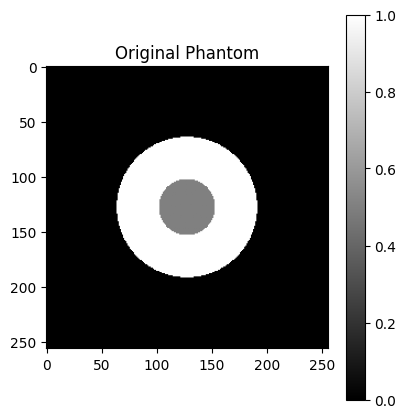

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(phantom, cmap='gray')
plt.title('Original Phantom')
plt.colorbar()

In [4]:
kspace = to_kspace(phantom)

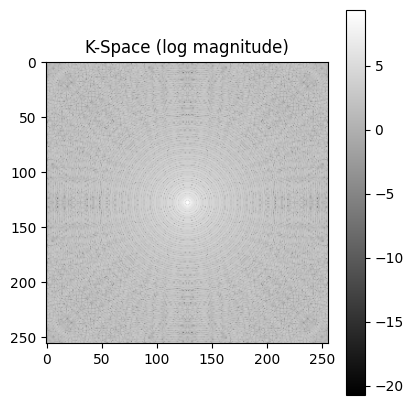

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(122)
plt.imshow(np.log(np.abs(kspace) + 1e-9), cmap='gray')
plt.title('K-Space (log magnitude)')
plt.colorbar()
plt.show()

## Apply random mask to higher frequencies

In [23]:
mask = create_random_mask(kspace.shape, acceleration=3)
undersampled_kspace = kspace * mask
zero_filled_recon = from_kspace(undersampled_kspace)

## Analyse reconstruction

PSNR: 24.47 dB


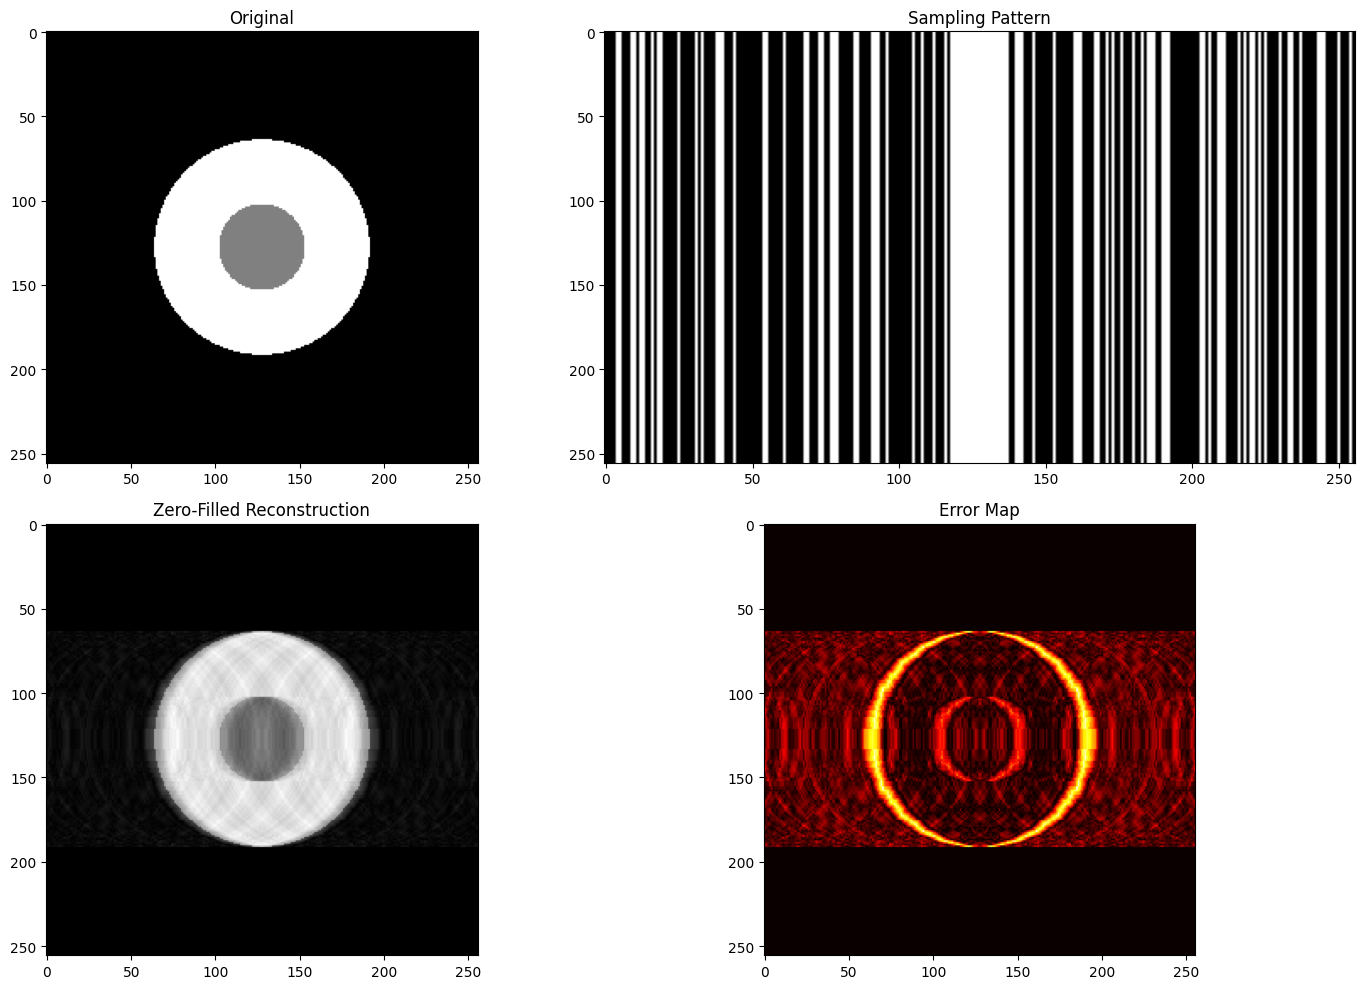

In [24]:
mse = np.mean((phantom - zero_filled_recon)**2)
psnr = 10 * np.log10(1.0 / mse)
print(f'PSNR: {psnr:.2f} dB')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].imshow(phantom, cmap='gray')
axes[0, 0].set_title('Original')

axes[0, 1].imshow(mask, cmap='gray', aspect='auto')
axes[0, 1].set_title('Sampling Pattern')

axes[1, 0].imshow(zero_filled_recon, cmap='gray')
axes[1, 0].set_title('Zero-Filled Reconstruction')

axes[1, 1].imshow(np.abs(phantom - zero_filled_recon), cmap='hot')
axes[1, 1].set_title('Error Map')

plt.tight_layout()
plt.show()